In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [4]:
df = pd.read_csv('train.csv')
sns.set()

In [5]:
pd.isnull(df).any()

Id               False
MSSubClass       False
MSZoning         False
LotFrontage       True
LotArea          False
Street           False
Alley             True
LotShape         False
LandContour      False
Utilities        False
LotConfig        False
LandSlope        False
Neighborhood     False
Condition1       False
Condition2       False
BldgType         False
HouseStyle       False
OverallQual      False
OverallCond      False
YearBuilt        False
YearRemodAdd     False
RoofStyle        False
RoofMatl         False
Exterior1st      False
Exterior2nd      False
MasVnrType        True
MasVnrArea        True
ExterQual        False
ExterCond        False
Foundation       False
                 ...  
BedroomAbvGr     False
KitchenAbvGr     False
KitchenQual      False
TotRmsAbvGrd     False
Functional       False
Fireplaces       False
FireplaceQu       True
GarageType        True
GarageYrBlt       True
GarageFinish      True
GarageCars       False
GarageArea       False
GarageQual 

In [6]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [7]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [8]:
len(df.columns)

81

In [9]:
df.SalePrice.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [10]:
len(df)

1460

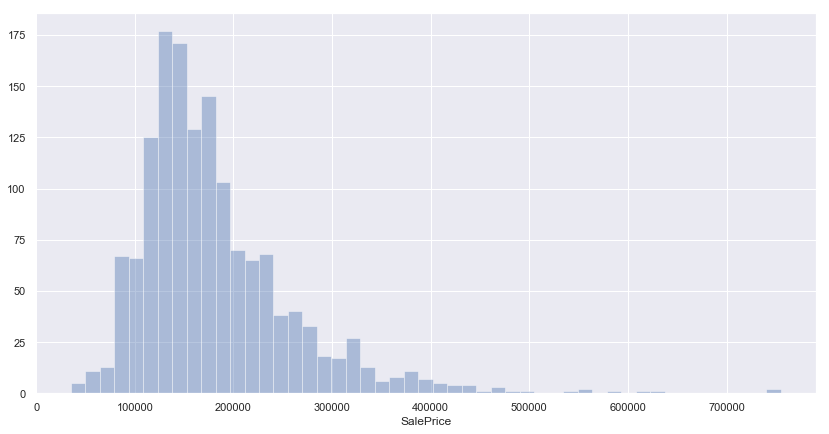

In [97]:
fig, ax = plt.subplots(figsize=(14,7))
sns.distplot(df['SalePrice'], ax=ax, kde=False)

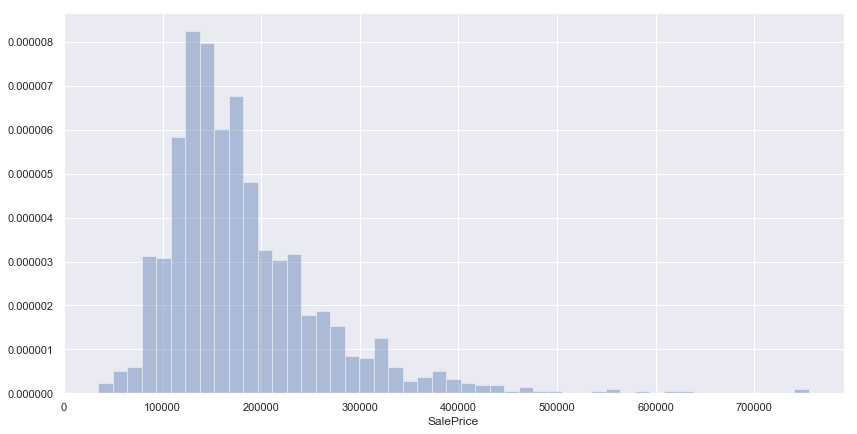

In [100]:
fig, ax = plt.subplots(figsize=(14,7))
sns.distplot(df['SalePrice'], ax=ax, kde=False, norm_hist=True)

In [34]:
df.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
                  ...   
BedroomAbvGr       int64
KitchenAbvGr       int64
KitchenQual       object
TotRmsAbvGrd       int64
Functional        object
Fireplaces         int64
FireplaceQu       object
GarageType        object
GarageYrBlt      float64


<Figure size 1080x1080 with 0 Axes>

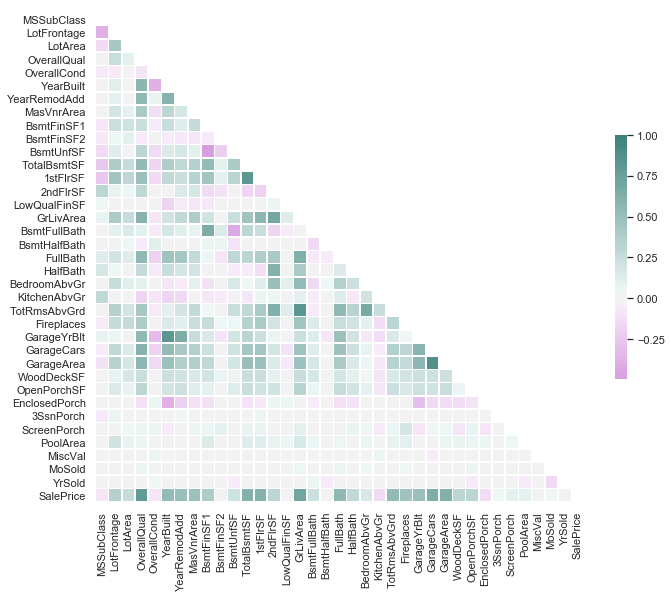

In [27]:
corr = df.select_dtypes(include=['float64', 'int64']).iloc[:,1:].corr()
plt.figure(figsize=(15,15))
sns.set_style("whitegrid", {'axes.grid' : False})
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(300, 180, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [31]:
sns.set()

In [48]:
cor_dict=corr['SalePrice'].to_dict()
del cor_dict['SalePrice']

output = [
    print("{0}: \t{1}".format(*entry))
    for entry in sorted(cor_dict.items(), key = lambda x: x[1], reverse=True)
]

OverallQual: 	0.7909816005838047
GrLivArea: 	0.7086244776126511
GarageCars: 	0.640409197258349
GarageArea: 	0.6234314389183598
TotalBsmtSF: 	0.6135805515591944
1stFlrSF: 	0.6058521846919166
FullBath: 	0.5606637627484452
TotRmsAbvGrd: 	0.5337231555820238
YearBuilt: 	0.5228973328794967
YearRemodAdd: 	0.5071009671113867
GarageYrBlt: 	0.48636167748786213
MasVnrArea: 	0.4774930470957107
Fireplaces: 	0.4669288367515242
BsmtFinSF1: 	0.38641980624215627
LotFrontage: 	0.35179909657067854
WoodDeckSF: 	0.32441344456813076
2ndFlrSF: 	0.31933380283206614
OpenPorchSF: 	0.31585622711605577
HalfBath: 	0.2841076755947784
LotArea: 	0.2638433538714063
BsmtFullBath: 	0.22712223313149718
BsmtUnfSF: 	0.214479105546969
BedroomAbvGr: 	0.1682131543007415
ScreenPorch: 	0.11144657114291048
PoolArea: 	0.09240354949187278
MoSold: 	0.04643224522381936
3SsnPorch: 	0.04458366533574792
BsmtFinSF2: 	-0.011378121450215216
BsmtHalfBath: 	-0.016844154297359294
MiscVal: 	-0.02118957964030379
LowQualFinSF: 	-0.0256061300006

In [47]:
corr_pearson = df.select_dtypes(include=['float64', 'int64']).iloc[:,1:].corr(method='pearson')
cor_dict_pearson=corr_pearson['SalePrice'].to_dict()
del cor_dict_pearson['SalePrice']

output = [
    print("{0}: \t{1}".format(*entry)) 
    for entry in sorted(cor_dict_pearson.items(), key = lambda x: x[1], reverse=True)
]

OverallQual: 	0.7909816005838047
GrLivArea: 	0.7086244776126511
GarageCars: 	0.640409197258349
GarageArea: 	0.6234314389183598
TotalBsmtSF: 	0.6135805515591944
1stFlrSF: 	0.6058521846919166
FullBath: 	0.5606637627484452
TotRmsAbvGrd: 	0.5337231555820238
YearBuilt: 	0.5228973328794967
YearRemodAdd: 	0.5071009671113867
GarageYrBlt: 	0.48636167748786213
MasVnrArea: 	0.4774930470957107
Fireplaces: 	0.4669288367515242
BsmtFinSF1: 	0.38641980624215627
LotFrontage: 	0.35179909657067854
WoodDeckSF: 	0.32441344456813076
2ndFlrSF: 	0.31933380283206614
OpenPorchSF: 	0.31585622711605577
HalfBath: 	0.2841076755947784
LotArea: 	0.2638433538714063
BsmtFullBath: 	0.22712223313149718
BsmtUnfSF: 	0.214479105546969
BedroomAbvGr: 	0.1682131543007415
ScreenPorch: 	0.11144657114291048
PoolArea: 	0.09240354949187278
MoSold: 	0.04643224522381936
3SsnPorch: 	0.04458366533574792
BsmtFinSF2: 	-0.011378121450215216
BsmtHalfBath: 	-0.016844154297359294
MiscVal: 	-0.02118957964030379
LowQualFinSF: 	-0.0256061300006

In [46]:
output = [
    print(k1, abs(v1-v2)) 
    for (k1,v1), (k2,v2) in zip(cor_dict.items(), cor_dict_pearson.items())
]

MSSubClass 0.0
LotFrontage 0.0
LotArea 0.0
OverallQual 0.0
OverallCond 0.0
YearBuilt 0.0
YearRemodAdd 0.0
MasVnrArea 0.0
BsmtFinSF1 0.0
BsmtFinSF2 0.0
BsmtUnfSF 0.0
TotalBsmtSF 0.0
1stFlrSF 0.0
2ndFlrSF 0.0
LowQualFinSF 0.0
GrLivArea 0.0
BsmtFullBath 0.0
BsmtHalfBath 0.0
FullBath 0.0
HalfBath 0.0
BedroomAbvGr 0.0
KitchenAbvGr 0.0
TotRmsAbvGrd 0.0
Fireplaces 0.0
GarageYrBlt 0.0
GarageCars 0.0
GarageArea 0.0
WoodDeckSF 0.0
OpenPorchSF 0.0
EnclosedPorch 0.0
3SsnPorch 0.0
ScreenPorch 0.0
PoolArea 0.0
MiscVal 0.0
MoSold 0.0
YrSold 0.0


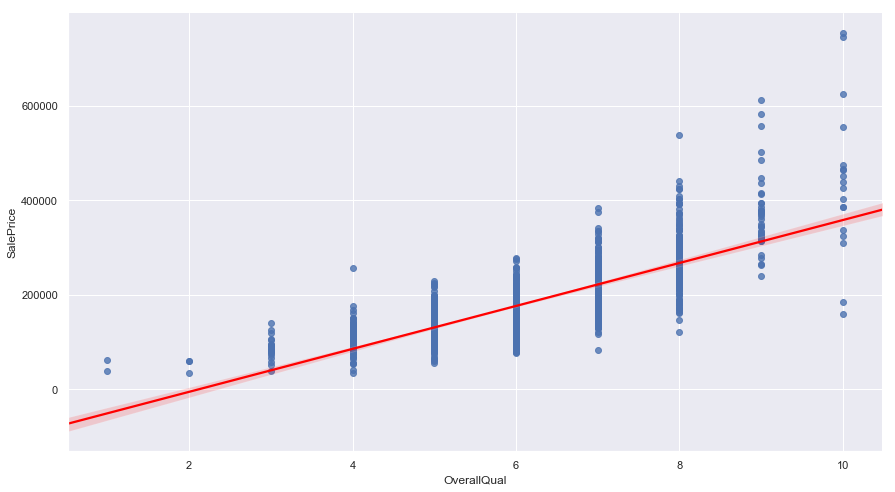

In [35]:
sns.lmplot(x='OverallQual', y='SalePrice', data=df, fit_reg=True, line_kws={'color': 'red'}, height=7, aspect=1.8)

<Figure size 432x288 with 0 Axes>

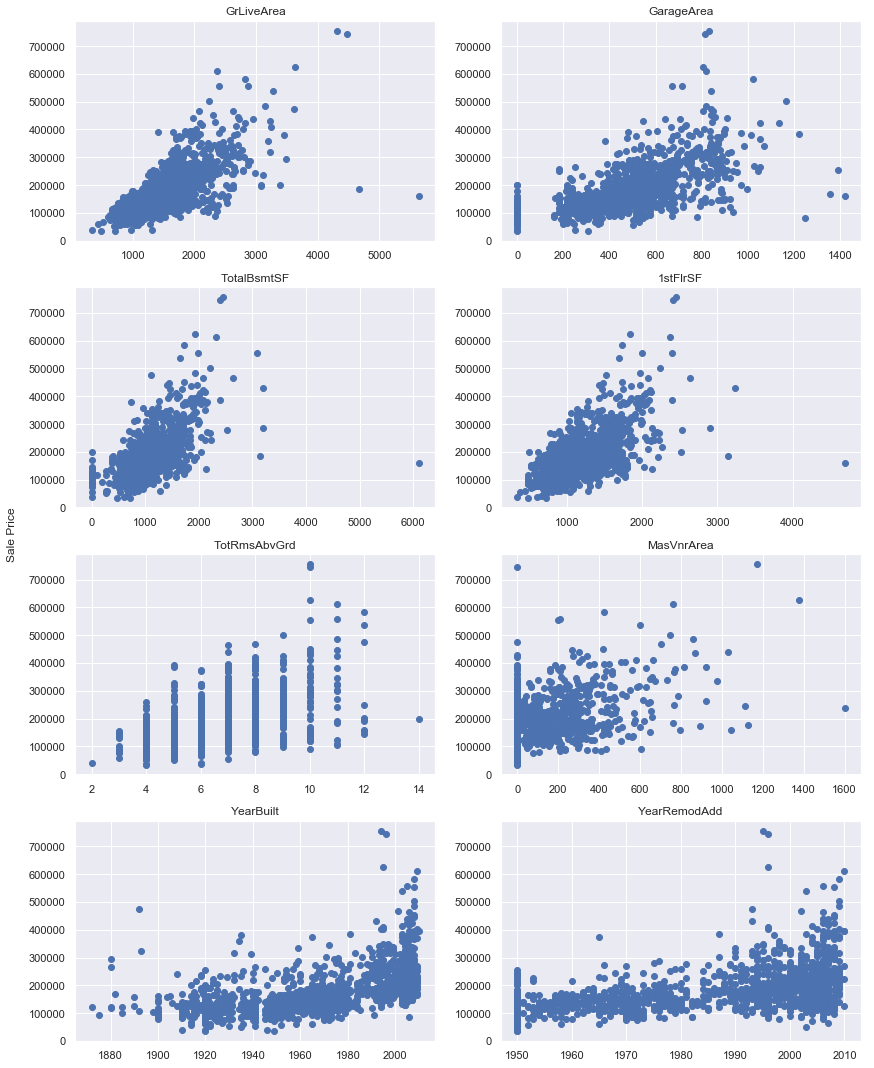

In [36]:
plt.figure(1)
f, axarr = plt.subplots(4, 2, figsize=(12, 15))
price = df.SalePrice.values
axarr[0, 0].scatter(df.GrLivArea.values, price)
axarr[0, 0].set_title('GrLiveArea')
axarr[0, 1].scatter(df.GarageArea.values, price)
axarr[0, 1].set_title('GarageArea')
axarr[1, 0].scatter(df.TotalBsmtSF.values, price)
axarr[1, 0].set_title('TotalBsmtSF')
axarr[1, 1].scatter(df['1stFlrSF'].values, price)
axarr[1, 1].set_title('1stFlrSF')
axarr[2, 0].scatter(df.TotRmsAbvGrd.values, price)
axarr[2, 0].set_title('TotRmsAbvGrd')
axarr[2, 1].scatter(df.MasVnrArea.values, price)
axarr[2, 1].set_title('MasVnrArea')
axarr[3, 0].scatter(df.YearBuilt.values, price)
axarr[3, 0].set_title('YearBuilt')
axarr[3, 1].scatter(df.YearRemodAdd.values, price)
axarr[3, 1].set_title('YearRemodAdd')
f.text(-0.01, 0.5, 'Sale Price', va='center', rotation='vertical', fontsize = 12)
plt.tight_layout()
plt.show()

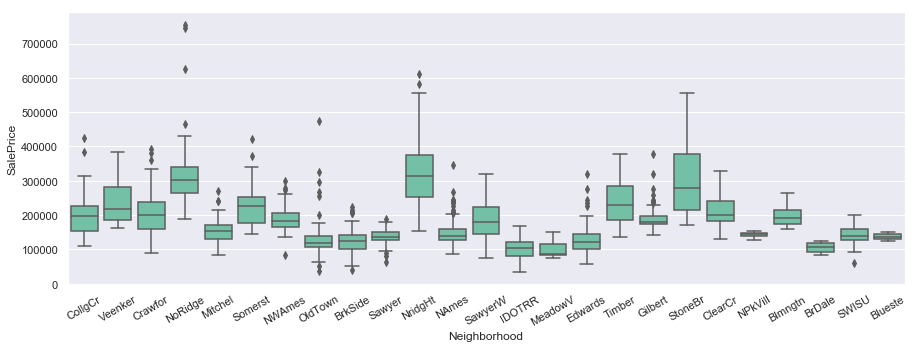

In [87]:
plt.figure(figsize=(15,5))
sns.boxplot(x='Neighborhood', y='SalePrice', data=df, color='mediumaquamarine')
xt= plt.xticks(rotation=30)


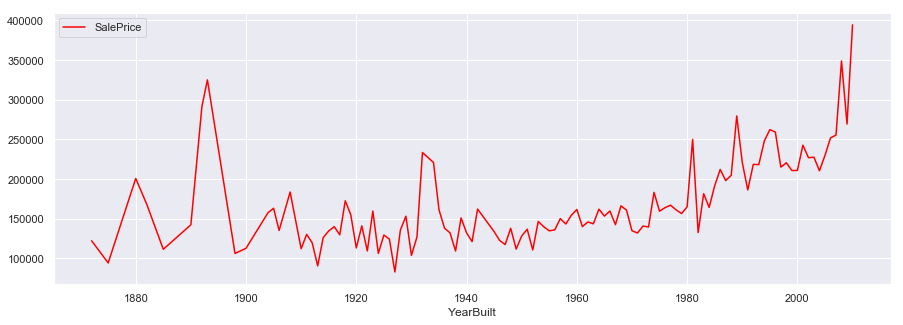

In [89]:
df_years = df[['YearBuilt', 'SalePrice']]
df_years.groupby(['YearBuilt']).mean().plot(figsize=(15,5), color='red')

<Figure size 1080x360 with 0 Axes>

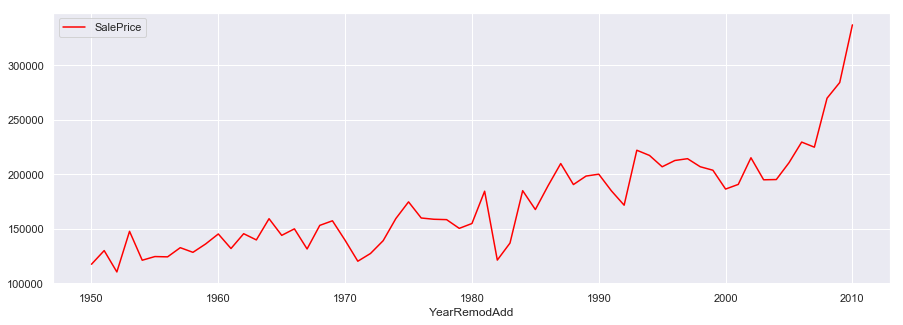

In [90]:
plt.figure(figsize=(15,5))
df_years = df[['YearRemodAdd', 'SalePrice']]
df_years.groupby(['YearRemodAdd']).mean().plot(figsize=(15,5), color='red')

In [9]:
plt.figure(figsize=(15,5))
df_years = df[['YrSold', 'SalePrice']]
df_years.groupby(['YrSold']).mean()

,SalePrice
YrSold,
2006,182549.458599
2007,186063.151976
2008,177360.838816
2009,179432.103550
2010,177393.674286


<Figure size 1080x360 with 0 Axes>

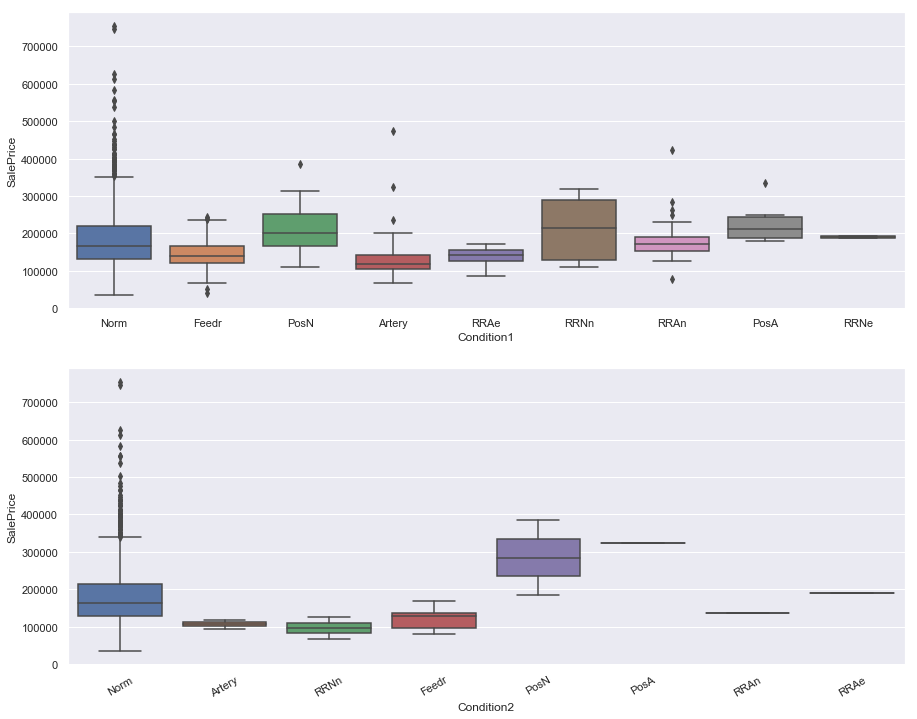

In [23]:
fig, ax = plt.subplots(2, 1, figsize = (15, 12))
sns.boxplot(x = 'Condition1', y = 'SalePrice', data = df, ax = ax[0])
sns.boxplot(x = 'Condition2', y = 'SalePrice', data = df, ax = ax[1])
x = plt.xticks(rotation = 30)
plt.show()

In [25]:
plt.figure(figsize=(15,5))
df_kitchenQuality = df[['KitchenQual', 'SalePrice']]
df_kitchenQuality.groupby(['KitchenQual']).mean()

,SalePrice
KitchenQual,
Ex,328554.670000
Fa,105565.205128
Gd,212116.023891
TA,139962.511565


<Figure size 1080x360 with 0 Axes>

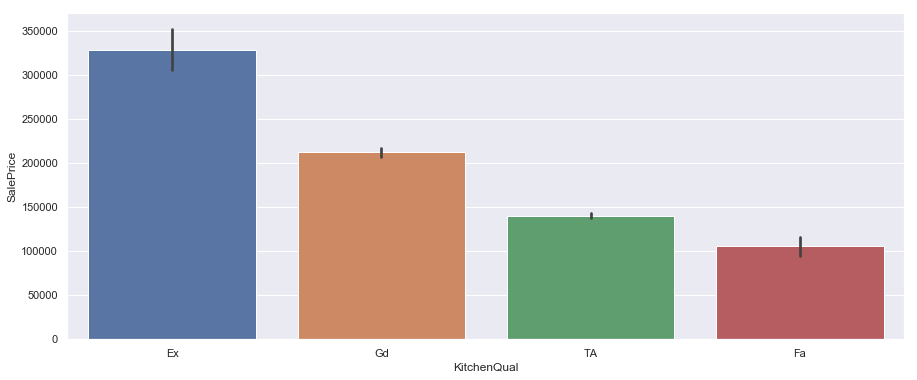

In [28]:
fig, ax = plt.subplots(figsize = (15, 6))
sns.barplot(x='KitchenQual', y='SalePrice', data = df_kitchenQuality, order = ['Ex', 'Gd', 'TA', 'Fa'], ax=ax)

In [49]:
df_SaleCondition = df[['SaleCondition', 'SalePrice']]
df_SaleCondition.groupby(['SaleCondition']).mean()

,SalePrice
SaleCondition,
Abnorml,146526.623762
AdjLand,104125.000000
Alloca,167377.416667
Family,149600.000000
Normal,175202.219533
Partial,272291.752000


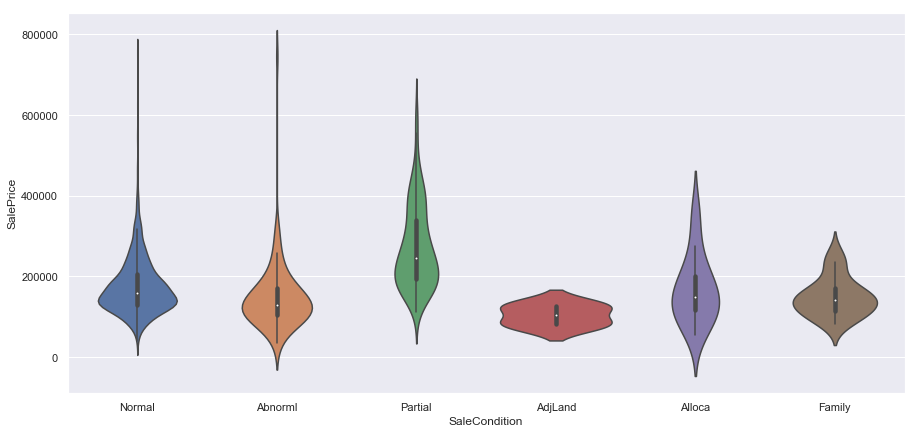

In [50]:
fig, ax = plt.subplots(figsize = (15, 7))
sns.violinplot(x="SaleCondition", y="SalePrice", data=df_SaleCondition, ax=ax);

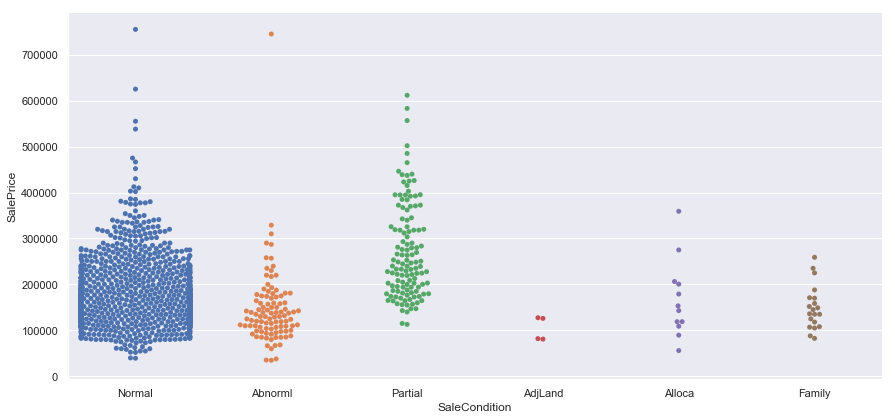

In [51]:
sns.catplot(x="SaleCondition", y="SalePrice", data=df_SaleCondition, kind="swarm", height=6, aspect=2.1)

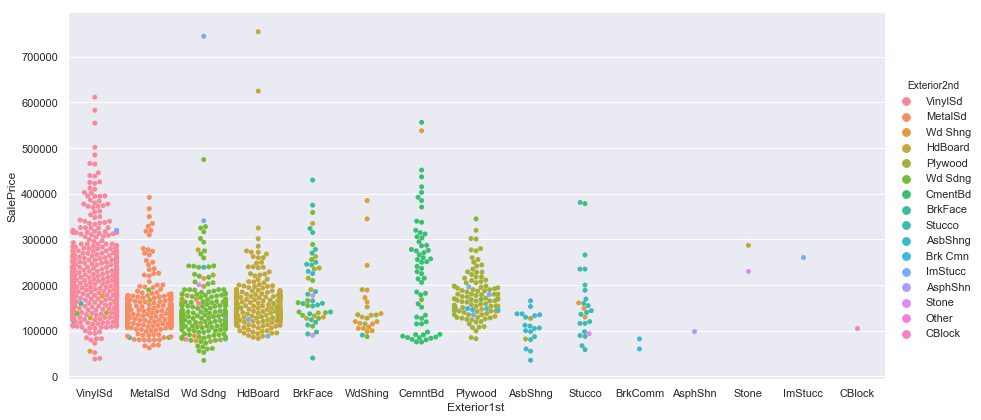

In [52]:
sns.catplot(x="Exterior1st", y="SalePrice", data=df, kind="swarm", height=6, aspect=2.1, hue='Exterior2nd')

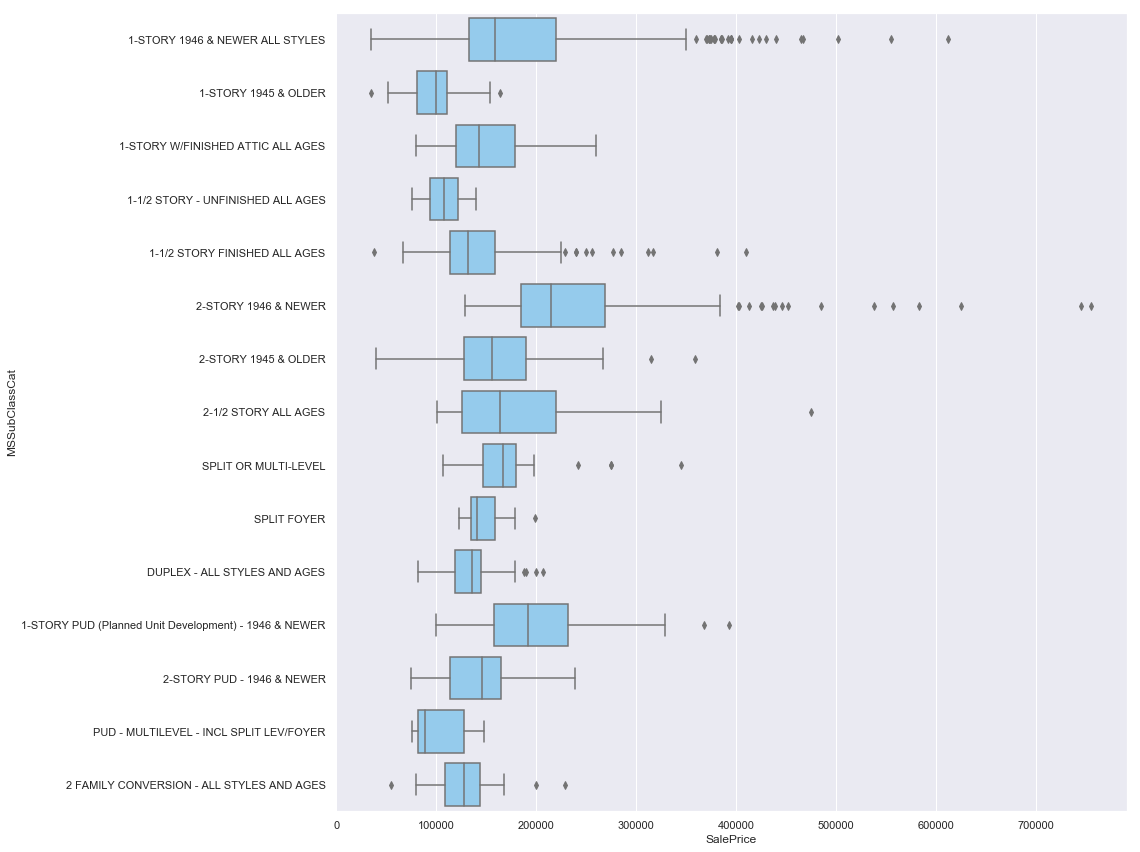

In [84]:
subClassDict = {
        20:'1-STORY 1946 & NEWER ALL STYLES',
        30:'1-STORY 1945 & OLDER',
        40:'1-STORY W/FINISHED ATTIC ALL AGES',
        45:'1-1/2 STORY - UNFINISHED ALL AGES',
        50:'1-1/2 STORY FINISHED ALL AGES',
        60:'2-STORY 1946 & NEWER',
        70:'2-STORY 1945 & OLDER',
        75:'2-1/2 STORY ALL AGES',
        80:'SPLIT OR MULTI-LEVEL',
        85:'SPLIT FOYER',
        90:'DUPLEX - ALL STYLES AND AGES',
       120:'1-STORY PUD (Planned Unit Development) - 1946 & NEWER',
       150:'1-1/2 STORY PUD - ALL AGES',
       160:'2-STORY PUD - 1946 & NEWER',
       180:'PUD - MULTILEVEL - INCL SPLIT LEV/FOYER',
       190:'2 FAMILY CONVERSION - ALL STYLES AND AGES'
}

MSSubClassCat = df['MSSubClass'].astype('category')

df['MSSubClassCat'] = MSSubClassCat.cat.rename_categories(subClassDict)
plt.figure(figsize=(16,12))
sns.boxplot(x='SalePrice', y='MSSubClassCat', data=df, orient='h', color='lightskyblue')
plt.tight_layout()